In [1]:
from utils import preprocess_input, transformer_predict, normalize_data

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


tabpfn_output tensor([  6.8254,   5.9535,  -7.3512,  -9.4713,  -8.0054,  -7.2566,  -9.4617,
         -9.2630, -10.0398,  -9.7588], grad_fn=<MeanBackward1>) tensor([0.5439, 1.4017, 1.6763, 1.5016, 0.5991, 0.6371, 0.3090, 0.7783, 0.5112,
        0.3642], grad_fn=<StdBackward0>)
tabpfn_output tensor([ 5.9795e-07,  1.3161e-07, -1.0000e+03, -1.0000e+03, -1.0000e+03,
        -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03],
       grad_fn=<MeanBackward1>) tensor([0.5439, 1.4017, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<StdBackward0>)
y_pred (array([0, 1]), array([381, 619]))
y (array([0., 1.], dtype=float32), array([507, 493]))
Accuracy tabpfn: 0.874
Accuracy RF: 0.896
Loss: -0.3247220516204834


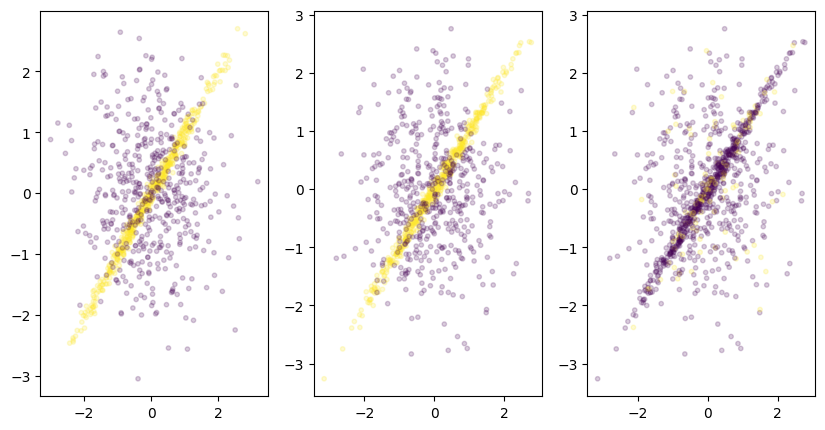

tabpfn_output tensor([  7.5193,   7.0790,  -8.4601, -10.3173,  -9.4964,  -8.7816, -10.7692,
        -10.4844, -11.7736, -11.4633], grad_fn=<MeanBackward1>) tensor([0.4890, 1.0181, 1.4922, 0.8633, 0.1854, 0.2622, 0.3220, 0.6791, 0.4337,
        0.3156], grad_fn=<StdBackward0>)
tabpfn_output tensor([-1.3924e-07,  4.9591e-08, -1.0000e+03, -1.0000e+03, -1.0000e+03,
        -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03],
       grad_fn=<MeanBackward1>) tensor([0.4890, 1.0181, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<StdBackward0>)
y_pred (array([0, 1]), array([267, 733]))
y (array([0., 1.], dtype=float32), array([487, 513]))
Accuracy tabpfn: 0.78
Accuracy RF: 0.812
Loss: -0.4597380459308624
tabpfn_output tensor([  7.0694,   6.5904,  -7.5449, -10.3683,  -8.5370,  -7.7570,  -9.7526,
         -9.9223, -11.0562, -10.7543], grad_fn=<MeanBackward1>) tensor([0.4247, 0.9135, 1.0240, 1.0113, 0.4031, 0.3970, 0.3196, 0.6143, 0.4065,
        0.

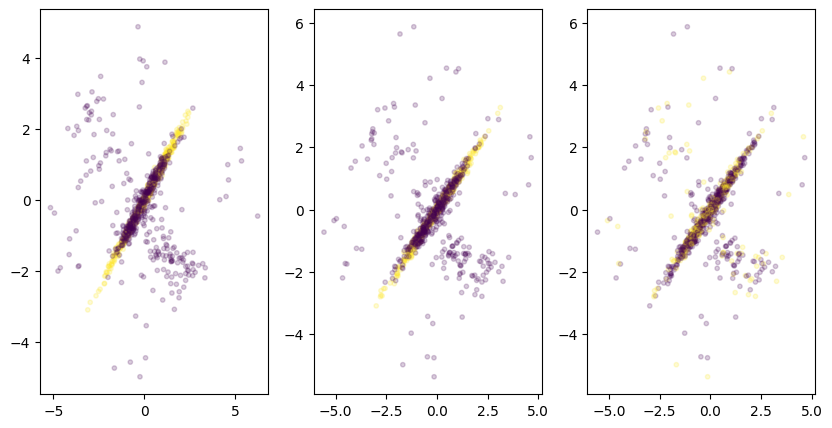

tabpfn_output tensor([  7.3100,   7.0951,  -7.0769, -10.5394,  -9.7175,  -8.4345, -10.3518,
        -11.1965, -12.8085, -12.1428], grad_fn=<MeanBackward1>) tensor([0.3502, 0.6627, 0.7745, 0.6711, 0.5735, 0.3740, 0.3552, 0.7763, 0.6680,
        0.4729], grad_fn=<StdBackward0>)
tabpfn_output tensor([-1.9503e-07,  7.5245e-07, -1.0000e+03, -1.0000e+03, -1.0000e+03,
        -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03, -1.0000e+03],
       grad_fn=<MeanBackward1>) tensor([0.3502, 0.6627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<StdBackward0>)
y_pred (array([0, 1]), array([180, 820]))
y (array([0., 1.], dtype=float32), array([496, 504]))
Accuracy tabpfn: 0.684
Accuracy RF: 0.686
Loss: -0.5721360445022583
tabpfn_output tensor([  7.5176,   7.4100,  -7.5571, -10.5037, -10.7711,  -9.4292, -10.8385,
        -11.2869, -12.9976, -12.4166], grad_fn=<MeanBackward1>) tensor([0.2886, 0.4757, 0.5818, 0.4651, 0.5064, 0.4082, 0.4028, 0.6262, 0.4940,
        0

KeyboardInterrupt: 

In [4]:
# import the california dataset
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from tabpfn.utils import normalize_data, to_ranking_low_mem, remove_outliers
from tabpfn.utils import NOP, normalize_by_used_features_f
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from tabpfn import TabPFNClassifier
import matplotlib.pyplot as plt
rf = RandomForestClassifier()
device = "cpu"

california = fetch_california_housing()
X_true = california.data

tabpfn = TabPFNClassifier(device=device).model[2]
# no requires_grad for the tabpfn
for param in tabpfn.parameters():
    param.requires_grad = False

# create a toy dataset, with two features identifcal + noise
X_true = np.random.randn(20_000, 2)
X_true[:, 1] = X_true[:, 0] + 0.1 * np.random.randn(20_000)

n_false_samples = 1000

# normalize X_true with a power transform
from sklearn.preprocessing import QuantileTransformer
#pt = PowerTransformer()
pt = QuantileTransformer(output_distribution='normal')
X_true = pt.fit_transform(X_true)
#y = california.target
# create random data with the same shape as the california dataset
import numpy as np
np.random.seed(0)
X_false = np.random.randn(n_false_samples, X_true.shape[1])
#X_false = X_true.copy()
# restrict to the n_false_samples random samples
X_false = X_false[np.random.choice(X_false.shape[0], n_false_samples, replace=False)]
X_false = torch.tensor(X_false).float().to(device)
#X_false.requires_grad = True
X_false_train = X_false[:n_false_samples // 2]
X_false_test = X_false[n_false_samples // 2:]
X_false_train.requires_grad = True
X_false_test.requires_grad = True


X_true = torch.tensor(X_true).float().to(device)
X_true.requires_grad = False

optimizer = torch.optim.Adam([X_false_test, X_false_train], lr=0.3)


n_batches = 200
loss_list = []

use_transformer_predict = False
shuffle_false_train_test = True

cross_entropy = torch.nn.CrossEntropyLoss()

def gaussian_kernel_penalty(X, sigma=1.0, lambda_kernel=0.01):
    n = X.size(0)
    # Compute pairwise differences
    diffs = X.unsqueeze(1) - X.unsqueeze(0)
    # Compute pairwise squared Euclidean distances
    dists_squared = diffs.pow(2).sum(2)
    
    # Compute the Gaussian (RBF) kernel values
    gaussian_kernel_values = torch.exp(-dists_squared / (2 * sigma ** 2))
    
    # Penalize only the points that are very close to each other, ignoring the diagonal (self-comparisons)
    penalty_mask = torch.eye(n, device=X.device) == 0
    close_pairs_penalty = gaussian_kernel_values * penalty_mask
    
    # Apply a scaling factor lambda_kernel to control the strength of the penalty
    penalty = lambda_kernel * close_pairs_penalty.sum()
    
    return penalty

for batch in range(n_batches):
    # select n_false_samples random samples from X_true
    indices = np.random.choice(X_true.shape[0], n_false_samples, replace=False)
    X_true_batch = X_true[indices]
    X_true_batch_train = X_true_batch[:n_false_samples // 2]
    X_true_batch_test = X_true_batch[n_false_samples // 2:]
    ##### First version ######
    # shuffle everything
    #merge the two and create a target 0/1 for True False
    X_train = torch.cat((X_true_batch_train, X_false_train), dim=0)
    y_train = torch.cat((torch.ones(X_true_batch_train.shape[0]), torch.zeros(X_false_train.shape[0])), dim=0).to(device).long()
    X_test = torch.cat((X_true_batch_test, X_false_test), dim=0)
    y_test = torch.cat((torch.ones(X_true_batch_test.shape[0]), torch.zeros(X_false_test.shape[0])), dim=0).to(device).long()
    # shuffle
    if not shuffle_false_train_test:
        perm_train = torch.randperm(X_train.shape[0])
        X_train = X_train[perm_train]
        y_train = y_train[perm_train]
        perm_test = torch.randperm(X_test.shape[0])
        X_test = X_test[perm_test]
        y_test = y_test[perm_test]
    ##### Second version ###### #FIXME
    # true first
    # shuffle X_true_batch
    # perm = torch.randperm(X_true_batch.shape[0])
    # X_true_batch = X_true_batch[perm]
    # # shuffle X_false
    # perm = torch.randperm(X_false.shape[0])
    # X_false = X_false[perm]
    # #merge the two and create a target 0/1 for True False
    # X = torch.cat((X_true_batch, X_false), dim=0)
    # y = torch.cat((torch.ones(X_true_batch.shape[0]), torch.zeros(X_false.shape[0])), dim=0).to(device).long()

    # #pad X with zeros to have a shape (-1, 100)
    # X = torch.cat((X, torch.zeros((X.shape[0], 100 - X.shape[1])).to(device)), dim=1)


    X = torch.cat((X_train, X_test), dim=0)
    y = torch.cat((y_train, y_test), dim=0).float()
    #X_2 = torch.cat((X_test, X_train), dim=0)
    #y_2 = torch.cat((y_test, y_train), dim=0).float()

    if shuffle_false_train_test:
        perm = torch.randperm(X.shape[0])
        X = X[perm]
        y = y[perm]

     # no gradient for train (i.e before single_eval_pos)
    # X = X.detach()
    # y = y.detach()
    # #X[:single_eval_pos].requires_grad = True
    # #y[single_eval_pos:].requires_grad = True
    # X.requires_grad = True
    # y.requires_grad = True


    # poad with zeros to have a shape (-1, 100) (not necessary for transformer_predict)
    if not use_transformer_predict:
        X = torch.cat((X, torch.zeros((X.shape[0], 100 - X.shape[1])).to(device)), dim=1)
        #X_2 = torch.cat((X_2, torch.zeros((X_2.shape[0], 100 - X_2.shape[1])).to(device)), dim=1)

    


    single_eval_pos = n_false_samples
    max_samples = 2 * n_false_samples #TODO remove
    if use_transformer_predict:
        tabpfn_input = X.reshape(X.shape[0], 1, X.shape[1])[:max_samples]
        tabpfn_output = transformer_predict(tabpfn, tabpfn_input, y[:max_samples].reshape(-1, 1), eval_position=single_eval_pos, device="cuda:0", no_grad=False, preprocess_transform="none",
                                            return_logits=True, N_ensemble_configurations=1)
    else:
        # normalize data
        #X = normalize_data(X) #TODO: remove this is a test
        tabpfn_output = tabpfn((X, y), single_eval_pos=single_eval_pos)
        #tabpfn_output_2 = tabpfn((X_2, y_2), single_eval_pos=single_eval_pos)
    tabpfn_output = tabpfn_output.squeeze(0)
    #tabpfn_output_2 = tabpfn_output_2.squeeze(0)
    #tabpfn_input_2 = X_2.reshape(X_2.shape[0], 1, X_2.shape[1])[:max_samples]
    #tabpfn_output_2 = transformer_predict(tabpfn, tabpfn_input_2, y_2[:max_samples].reshape(-1, 1), eval_position=single_eval_pos, device="cuda:0", no_grad=False, preprocess_transform="none")
    #tabpfn_output_2 = tabpfn_output_2.squeeze(0)
    #TODO: equalize the probability, because right now the optimization just push the model to always predict 1
    # equalize the mean probability of the two classes and put them between 0 and 1
    # compute the mean for each class
    #mean_proba = torch.mean(tabpfn_output, dim=0)
    # compute the difference between the two means
    #diff = mean_proba[0] - mean_proba[1]
    #print(f"diff: {diff}")
    # add the difference to the two classes
    #tabpfn_output[:, 0] = tabpfn_output[:, 0] + diff
    # compute accuracy
    ## compute loss as the entropy of tabpfn_output (minus to maximize entropy)
    # TODO: maybe restrict the loss to X_false in test, or at least look at the loss on X_true
    #FIXME
    #loss = - torch.mean(torch.sum(-tabpfn_output_proba * torch.log2(tabpfn_output_proba + 1e-6), dim=1))# -torch.mean(torch.sum(-tabpfn_output_2 * torch.log2(tabpfn_output_2 + 1e-6), dim=1))
    # compute loss as minus cross entropy
    # equalize logits for both classes in tabpfn_output
    print("tabpfn_output", tabpfn_output.mean(dim=0), tabpfn_output.std(dim=0))
    tabpfn_output = tabpfn_output - torch.mean(tabpfn_output, dim=0)#.values
    #tabpfn_output = tabpfn_output - torch.median(tabpfn_output, dim=0).values
    # divide by the std
    #tabpfn_output = tabpfn_output / torch.std(tabpfn_output, dim=0)
    # set the output two zeros for all classes except the first 2
    tabpfn_output[:, 2:] = -1000
    print("tabpfn_output", tabpfn_output.mean(dim=0), tabpfn_output.std(dim=0))

    tabpfn_output_proba = torch.nn.functional.softmax(tabpfn_output, dim=1)
    y_pred = tabpfn_output.argmax(dim=1)
    # rebalance
    print("y_pred", np.unique(y_pred.cpu().numpy(), return_counts=True))
    print("y", np.unique(y[single_eval_pos:max_samples].cpu().numpy(), return_counts=True))
    accuracy = accuracy_score(y[single_eval_pos:max_samples].cpu().numpy(), y_pred.cpu().numpy())
    print(f"Accuracy tabpfn: {accuracy}")
    # compute accuracy of a random forest
    rf.fit(X.cpu().detach().numpy()[:single_eval_pos], y.cpu().numpy()[:single_eval_pos])
    y_pred_rf = rf.predict(X.cpu().detach().numpy()[single_eval_pos:max_samples])
    accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf)
    print(f"Accuracy RF: {accuracy_rf}")
    #loss = - torch.mean(torch.sum(-tabpfn_output_proba * torch.log2(tabpfn_output_proba + 1e-6), dim=1))# -torch.mean(torch.sum(-tabpfn_output_2 * torch.log2(tabpfn_output_2 + 1e-6), dim=1))
    loss = - cross_entropy(tabpfn_output, y[single_eval_pos:max_samples].long())# - cross_entropy(tabpfn_output_2, y_2[single_eval_pos:max_samples].long())
    # add a loss to enforce the prediction to be balanced
    #loss += 0.5 * torch.abs(torch.mean(tabpfn_output[:, 0]) - torch.mean(tabpfn_output[:, 1]))
    ## add a penalty on each features to respect the gaussian distribution
    #loss -= 0.5 * torch.mean(torch.sum(torch.exp(-X_false**2), dim=1))
    # add a penalty to prevent each point of X_false to be the same
    #loss -= 0.05 * torch.mean(torch.sum((X_false[1:] - X_false[:-1])**2, dim=1))
    #loss += gaussian_kernel_penalty(X_false, lambda_kernel=0.05, sigma=0.05)
    loss_list.append(loss.item())
    print(f"Loss: {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 20 == 0:
        fig, axs = plt.subplots(1, 3, figsize=(10, 5))
        # plot latitude
        #axs[0].scatter(X[:, 0].cpu().detach().numpy(), X[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.1, c=y.cpu().numpy())
        axs[0].scatter(X_train[:, 0].cpu().detach().numpy(), X_train[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.2, c=y_train.cpu().numpy())
        axs[1].scatter(X_test[:, 0].cpu().detach().numpy(), X_test[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.2, c=y_test.cpu().numpy())
        # show the error
        axs[2].scatter(X_test[:, 0].cpu().detach().numpy(), X_test[:, 1].cpu().detach().numpy(), label="False", s=10, alpha=0.2, c=(y_pred != y[single_eval_pos:max_samples]).cpu().numpy())
        # change palette for the last plot
        axs[2].set_prop_cycle(None)
        #axs[0].scatter(X[:, 0].cpu().detach().numpy(), X[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.1, c=y.cpu().numpy())
        #axs[1].scatter(X_false[:, 0].cpu().detach().numpy(), X_false[:, 1].cpu().detach().numpy(), label="False", s=3, alpha=0.5, c=y.cpu().numpy()[:1000])
        plt.show()

In [3]:
# import the california dataset
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from tabpfn.utils import normalize_data, to_ranking_low_mem, remove_outliers
from tabpfn.utils import NOP, normalize_by_used_features_f
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from tabpfn import TabPFNClassifier
import matplotlib.pyplot as plt
rf = RandomForestClassifier()
device = "cpu"

california = fetch_california_housing()
X_true = california.data

tabpfn = TabPFNClassifier(device="cpu").model[2]
# no requires_grad for the tabpfn
for param in tabpfn.parameters():
    param.requires_grad = False

# create a toy dataset, with two features identifcal + noise
X_true = np.random.randn(20_000, 2)
X_true[:, 1] = X_true[:, 0] + 0.1 * np.random.randn(20_000)

n_false_samples = 1000

# normalize X_true with a power transform
from sklearn.preprocessing import QuantileTransformer
#pt = PowerTransformer()
pt = QuantileTransformer(output_distribution='normal')
X_true = pt.fit_transform(X_true)
#y = california.target
# create random data with the same shape as the california dataset
import numpy as np
np.random.seed(0)
X_false = np.random.randn(n_false_samples, X_true.shape[1])
#X_false = X_true.copy()
# restrict to the n_false_samples random samples
X_false = X_false[np.random.choice(X_false.shape[0], n_false_samples, replace=False)]
X_false = torch.tensor(X_false).float().to(device)
#X_false.requires_grad = True
X_false_train = X_false[:n_false_samples // 2]
X_false_test = X_false[n_false_samples // 2:]
X_false_train.requires_grad = True
X_false_test.requires_grad = True


X_true = torch.tensor(X_true).float().to(device)
X_true.requires_grad = False

optimizer = torch.optim.Adam([X_false_test, X_false_train], lr=0.3)


n_batches = 200
loss_list = []

use_transformer_predict = False
shuffle_false_train_test = False

cross_entropy = torch.nn.CrossEntropyLoss()

def gaussian_kernel_penalty(X, sigma=1.0, lambda_kernel=0.01):
    n = X.size(0)
    # Compute pairwise differences
    diffs = X.unsqueeze(1) - X.unsqueeze(0)
    # Compute pairwise squared Euclidean distances
    dists_squared = diffs.pow(2).sum(2)
    
    # Compute the Gaussian (RBF) kernel values
    gaussian_kernel_values = torch.exp(-dists_squared / (2 * sigma ** 2))
    
    # Penalize only the points that are very close to each other, ignoring the diagonal (self-comparisons)
    penalty_mask = torch.eye(n, device=X.device) == 0
    close_pairs_penalty = gaussian_kernel_values * penalty_mask
    
    # Apply a scaling factor lambda_kernel to control the strength of the penalty
    penalty = lambda_kernel * close_pairs_penalty.sum()
    
    return penalty

for batch in range(n_batches):
    with torch.no_grad():
        # select n_false_samples random samples from X_true
        indices = np.random.choice(X_true.shape[0], n_false_samples, replace=False)
        X_true_batch = X_true[indices]
        X_true_batch_train = X_true_batch[:n_false_samples // 2]
        X_true_batch_test = X_true_batch[n_false_samples // 2:]
        ##### First version ######
        # shuffle everything
        #merge the two and create a target 0/1 for True False
        X_false = torch.cat((X_false_train, X_false_test), dim=0)
        perm_false = torch.randperm(X_false.shape[0])
        X_false = X_false[perm_false].detach()
        X_false_train, X_false_test = X_false[:n_false_samples // 2], X_false[n_false_samples // 2:]
    X_false_test.requires_grad = True

    X_train = torch.cat((X_true_batch_train, X_false_train), dim=0)
    y_train = torch.cat((torch.ones(X_true_batch_train.shape[0]), torch.zeros(X_false_train.shape[0])), dim=0).to(device).long()
    X_test = torch.cat((X_true_batch_test, X_false_test), dim=0)
    y_test = torch.cat((torch.ones(X_true_batch_test.shape[0]), torch.zeros(X_false_test.shape[0])), dim=0).to(device).long()
    # shuffle
    if not shuffle_false_train_test:
        perm_train = torch.randperm(X_train.shape[0])
        X_train = X_train[perm_train]
        y_train = y_train[perm_train]
        perm_test = torch.randperm(X_test.shape[0])
        X_test = X_test[perm_test]
        y_test = y_test[perm_test]
    ##### Second version ###### #FIXME
    # true first
    # shuffle X_true_batch
    # perm = torch.randperm(X_true_batch.shape[0])
    # X_true_batch = X_true_batch[perm]
    # # shuffle X_false
    # perm = torch.randperm(X_false.shape[0])
    # X_false = X_false[perm]
    # #merge the two and create a target 0/1 for True False
    # X = torch.cat((X_true_batch, X_false), dim=0)
    # y = torch.cat((torch.ones(X_true_batch.shape[0]), torch.zeros(X_false.shape[0])), dim=0).to(device).long()

    # #pad X with zeros to have a shape (-1, 100)
    # X = torch.cat((X, torch.zeros((X.shape[0], 100 - X.shape[1])).to(device)), dim=1)


    X = torch.cat((X_train, X_test), dim=0)
    y = torch.cat((y_train, y_test), dim=0).float()
    #X_2 = torch.cat((X_test, X_train), dim=0)
    #y_2 = torch.cat((y_test, y_train), dim=0).float()

    if shuffle_false_train_test:
        perm = torch.randperm(X.shape[0])
        X = X[perm]
        y = y[perm]

     # no gradient for train (i.e before single_eval_pos)
    # X = X.detach()
    # y = y.detach()
    # #X[:single_eval_pos].requires_grad = True
    # #y[single_eval_pos:].requires_grad = True
    # X.requires_grad = True
    # y.requires_grad = True


    # poad with zeros to have a shape (-1, 100) (not necessary for transformer_predict)
    if not use_transformer_predict:
        X = torch.cat((X, torch.zeros((X.shape[0], 100 - X.shape[1])).to(device)), dim=1)
        #X_2 = torch.cat((X_2, torch.zeros((X_2.shape[0], 100 - X_2.shape[1])).to(device)), dim=1)

    


    single_eval_pos = n_false_samples
    max_samples = 2 * n_false_samples #TODO remove
    if use_transformer_predict:
        tabpfn_input = X.reshape(X.shape[0], 1, X.shape[1])[:max_samples]
        tabpfn_output = transformer_predict(tabpfn, tabpfn_input, y[:max_samples].reshape(-1, 1), eval_position=single_eval_pos, device="cuda:0", no_grad=False, preprocess_transform="none",
                                            return_logits=True, N_ensemble_configurations=1)
    else:
        # normalize data
        #X = normalize_data(X) #TODO: remove this is a test
        tabpfn_output = tabpfn((X, y), single_eval_pos=single_eval_pos)
        #tabpfn_output_2 = tabpfn((X_2, y_2), single_eval_pos=single_eval_pos)
    tabpfn_output = tabpfn_output.squeeze(0)
    #tabpfn_output_2 = tabpfn_output_2.squeeze(0)
    #tabpfn_input_2 = X_2.reshape(X_2.shape[0], 1, X_2.shape[1])[:max_samples]
    #tabpfn_output_2 = transformer_predict(tabpfn, tabpfn_input_2, y_2[:max_samples].reshape(-1, 1), eval_position=single_eval_pos, device="cuda:0", no_grad=False, preprocess_transform="none")
    #tabpfn_output_2 = tabpfn_output_2.squeeze(0)
    #TODO: equalize the probability, because right now the optimization just push the model to always predict 1
    # equalize the mean probability of the two classes and put them between 0 and 1
    # compute the mean for each class
    #mean_proba = torch.mean(tabpfn_output, dim=0)
    # compute the difference between the two means
    #diff = mean_proba[0] - mean_proba[1]
    #print(f"diff: {diff}")
    # add the difference to the two classes
    #tabpfn_output[:, 0] = tabpfn_output[:, 0] + diff
    # compute accuracy
    ## compute loss as the entropy of tabpfn_output (minus to maximize entropy)
    # TODO: maybe restrict the loss to X_false in test, or at least look at the loss on X_true
    #FIXME
    #loss = - torch.mean(torch.sum(-tabpfn_output_proba * torch.log2(tabpfn_output_proba + 1e-6), dim=1))# -torch.mean(torch.sum(-tabpfn_output_2 * torch.log2(tabpfn_output_2 + 1e-6), dim=1))
    # compute loss as minus cross entropy
    # equalize logits for both classes in tabpfn_output
    print("tabpfn_output", tabpfn_output.mean(dim=0), tabpfn_output.std(dim=0))
    tabpfn_output = tabpfn_output - torch.mean(tabpfn_output, dim=0)#.values
    #tabpfn_output = tabpfn_output - torch.median(tabpfn_output, dim=0).values
    # divide by the std
    #tabpfn_output = tabpfn_output / torch.std(tabpfn_output, dim=0)
    # set the output two zeros for all classes except the first 2
    tabpfn_output[:, 2:] = -1000
    print("tabpfn_output", tabpfn_output.mean(dim=0), tabpfn_output.std(dim=0))

    tabpfn_output_proba = torch.nn.functional.softmax(tabpfn_output, dim=1)
    y_pred = tabpfn_output.argmax(dim=1)
    # rebalance
    print("y_pred", np.unique(y_pred.cpu().numpy(), return_counts=True))
    print("y", np.unique(y[single_eval_pos:max_samples].cpu().numpy(), return_counts=True))
    accuracy = accuracy_score(y[single_eval_pos:max_samples].cpu().numpy(), y_pred.cpu().numpy())
    print(f"Accuracy tabpfn: {accuracy}")
    # compute accuracy of a random forest
    rf.fit(X.cpu().detach().numpy()[:single_eval_pos], y.cpu().numpy()[:single_eval_pos])
    y_pred_rf = rf.predict(X.cpu().detach().numpy()[single_eval_pos:max_samples])
    accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf)
    print(f"Accuracy RF: {accuracy_rf}")
    #loss = - torch.mean(torch.sum(-tabpfn_output_proba * torch.log2(tabpfn_output_proba + 1e-6), dim=1))# -torch.mean(torch.sum(-tabpfn_output_2 * torch.log2(tabpfn_output_2 + 1e-6), dim=1))
    loss = - cross_entropy(tabpfn_output, y[single_eval_pos:max_samples].long())# - cross_entropy(tabpfn_output_2, y_2[single_eval_pos:max_samples].long())
    # add a loss to enforce the prediction to be balanced
    #loss += 0.5 * torch.abs(torch.mean(tabpfn_output[:, 0]) - torch.mean(tabpfn_output[:, 1]))
    ## add a penalty on each features to respect the gaussian distribution
    #loss -= 0.5 * torch.mean(torch.sum(torch.exp(-X_false**2), dim=1))
    # add a penalty to prevent each point of X_false to be the same
    #loss -= 0.05 * torch.mean(torch.sum((X_false[1:] - X_false[:-1])**2, dim=1))
    #loss += gaussian_kernel_penalty(X_false, lambda_kernel=0.05, sigma=0.05)
    loss_list.append(loss.item())
    print(f"Loss: {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 20 == 0:
        fig, axs = plt.subplots(1, 3, figsize=(10, 5))
        # plot latitude
        #axs[0].scatter(X[:, 0].cpu().detach().numpy(), X[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.1, c=y.cpu().numpy())
        axs[0].scatter(X_train[:, 0].cpu().detach().numpy(), X_train[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.2, c=y_train.cpu().numpy())
        axs[1].scatter(X_test[:, 0].cpu().detach().numpy(), X_test[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.2, c=y_test.cpu().numpy())
        # show the error
        axs[2].scatter(X_test[:, 0].cpu().detach().numpy(), X_test[:, 1].cpu().detach().numpy(), label="False", s=10, alpha=0.2, c=(y_pred != y[single_eval_pos:max_samples]).cpu().numpy())
        # change palette for the last plot
        axs[2].set_prop_cycle(None)
        #axs[0].scatter(X[:, 0].cpu().detach().numpy(), X[:, 1].cpu().detach().numpy(), label="True", s=10, alpha=0.1, c=y.cpu().numpy())
        #axs[1].scatter(X_false[:, 0].cpu().detach().numpy(), X_false[:, 1].cpu().detach().numpy(), label="False", s=3, alpha=0.5, c=y.cpu().numpy()[:1000])
        plt.show()

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

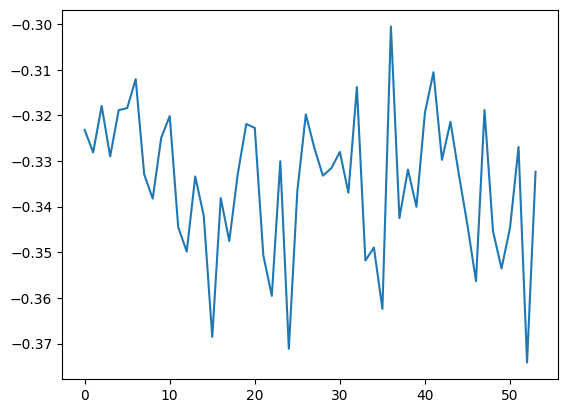

In [17]:
plt.plot(loss_list)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X.cpu().detach().numpy()[:single_eval_pos, :2], y.cpu().numpy()[:single_eval_pos])
#y_pred = tabpfn((X, y), single_eval_pos=single_eval_pos)
# convert to predictions
#y_pred_rf = y_pred.argmax(dim=1)
y_pred_rf = rf.predict(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
y_pred_proba_rf = rf.predict_proba(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
#accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf.cpu().numpy())
accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf)
print(f"Accuracy RF: {accuracy_rf}")

# plot rf predictions for 10 samples
import matplotlib.pyplot as plt
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=y_pred_rf)
#plt.scatter(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_proba_rf[:, 0])
# show samples where the rf is wrong
#mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf.cpu().numpy()
mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf
# plot everything and color with the mask
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=mask, cmap='viridis')
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0][mask], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1][mask], c=y_pred_rf[mask], alpha=0.3)
#cmap='viridis')
plt.show()

# show decision boundary of the random forest
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
X_grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1).to(device)
# concatenate X_train and X_grid
#X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
# concatenate X_train and X_grid
# pad X_grid with zeros
#X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
#X_grid = torch.cat((X[:single_eval_pos], X_grid), dim=0)
y_grid = torch.cat((y[:single_eval_pos], torch.zeros(X_grid.shape[0] - single_eval_pos).to(device)), dim=0)
print(X_grid.shape, yy.shape)
Z = rf.predict(X_grid.cpu().numpy()).reshape(xx.shape)
#Z = tabpfn((X_grid, y_grid), single_eval_pos=len(X_train)).argmax(dim=1).cpu().numpy().reshape(xx.shape)

plt.contourf(xx.cpu().numpy(), yy.cpu().numpy(), Z, alpha=0.5)
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1]) #c=y.cpu().numpy()[single_eval_pos:max_samples])
plt.show()

In [ ]:
rf = TabPFNClassifier()
rf.fit(X.cpu().detach().numpy()[:single_eval_pos, :2], y.cpu().numpy()[:single_eval_pos])
#y_pred = tabpfn((X, y), single_eval_pos=single_eval_pos)
# convert to predictions
#y_pred_rf = y_pred.argmax(dim=1)
y_pred_rf = rf.predict(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
y_pred_proba_rf = rf.predict_proba(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
#accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf.cpu().numpy())
accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf)
print(f"Accuracy RF: {accuracy_rf}")

# plot rf predictions for 10 samples
import matplotlib.pyplot as plt
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=y_pred_rf)
#plt.scatter(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_proba_rf[:, 0])
# show samples where the rf is wrong
#mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf.cpu().numpy()
mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf
# plot everything and color with the mask
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=mask, cmap='viridis')
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0][mask], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1][mask], c=y_pred_rf[mask], alpha=0.3)
#cmap='viridis')
plt.show()

# show decision boundary of the random forest
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
X_grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1).to(device)
# concatenate X_train and X_grid
#X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
# concatenate X_train and X_grid
# pad X_grid with zeros
#X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
#X_grid = torch.cat((X[:single_eval_pos], X_grid), dim=0)
y_grid = torch.cat((y[:single_eval_pos], torch.zeros(X_grid.shape[0] - single_eval_pos).to(device)), dim=0)
print(X_grid.shape, yy.shape)
Z = rf.predict(X_grid.cpu().numpy()).reshape(xx.shape)
#Z = tabpfn((X_grid, y_grid), single_eval_pos=len(X_train)).argmax(dim=1).cpu().numpy().reshape(xx.shape)

plt.contourf(xx.cpu().numpy(), yy.cpu().numpy(), Z, alpha=0.5)
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1]) #c=y.cpu().numpy()[single_eval_pos:max_samples])
plt.show()

In [ ]:
#rf = RandomForestClassifier()
#TODO: change variable names
#rf.fit(X.cpu().detach().numpy()[:single_eval_pos, :2], y.cpu().numpy()[:single_eval_pos])
y_pred = tabpfn((X, y), single_eval_pos=single_eval_pos)
# convert to predictions
y_pred_rf = y_pred.argmax(dim=1)
#y_pred_rf = rf.predict(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
#y_pred_proba_rf = rf.predict_proba(X.cpu().detach().numpy()[single_eval_pos:max_samples, :2])
accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf.cpu().numpy())
#accuracy_rf = accuracy_score(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_rf)
print(f"Accuracy tabpfn: {accuracy_rf}")

# plot rf predictions for 10 samples
import matplotlib.pyplot as plt
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=y_pred_rf)
#plt.scatter(y.cpu().numpy()[single_eval_pos:max_samples], y_pred_proba_rf[:, 0])
# show samples where the rf is wrong
mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf.cpu().numpy()
#mask = y.cpu().numpy()[single_eval_pos:max_samples] != y_pred_rf
# plot everything and color with the mask
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1], c=mask, cmap='viridis')
#plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0][mask], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1][mask], c=y_pred_rf[mask], alpha=0.3)
#cmap='viridis')
plt.show()

# show decision boundary of the random forest
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
X_grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1).to(device)
# concatenate X_train and X_grid
X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
# concatenate X_train and X_grid
# pad X_grid with zeros
X_grid = torch.cat((X_grid, torch.zeros((X_grid.shape[0], 100 - X_grid.shape[1])).to(device)), dim=1)
X_grid = torch.cat((X[:single_eval_pos], X_grid), dim=0)
y_grid = torch.cat((y[:single_eval_pos], torch.zeros(X_grid.shape[0] - single_eval_pos).to(device)), dim=0)
print(X_grid.shape, yy.shape)
#Z = rf.predict(X_grid.cpu().numpy()).reshape(xx.shape)
Z = tabpfn((X_grid, y_grid), single_eval_pos=len(X_train)).argmax(dim=1).cpu().numpy().reshape(xx.shape)

plt.contourf(xx.cpu().numpy(), yy.cpu().numpy(), Z, alpha=0.5)
plt.scatter(X.cpu().detach().numpy()[single_eval_pos:max_samples, 0], X.cpu().detach().numpy()[single_eval_pos:max_samples, 1]) #c=y.cpu().numpy()[single_eval_pos:max_samples])
plt.show()

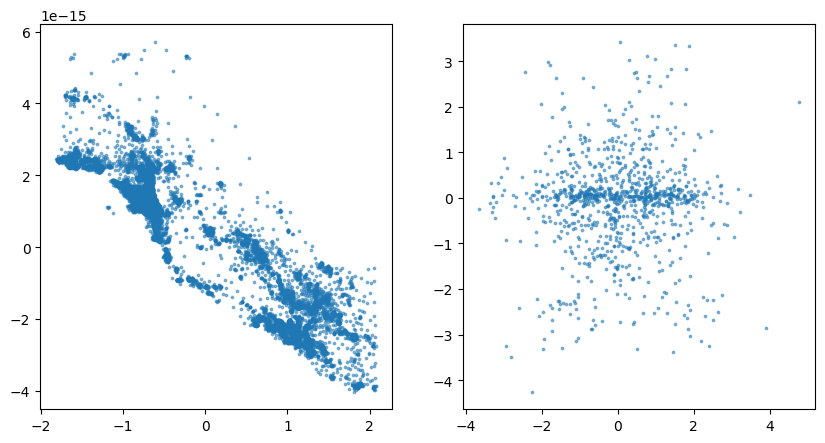

In [43]:
# plot latitude (6) and longitude for X_true and X_false
import matplotlib.pyplot as plt
# create 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)
# plot latitude
axs[0].scatter(X_true[:, 6].cpu().detach().numpy(), X_true[:, 7].cpu().detach().numpy(), label="True", s=3, alpha=0.5)
axs[1].scatter(X_false[:, 6].cpu().detach().numpy(), X_false[:, 7].cpu().detach().numpy(), label="False", s=3, alpha=0.5)
plt.show()